<a href="https://colab.research.google.com/github/Preeti27092000/Expense_profit_keras_model/blob/main/profit_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = "/content/drive/MyDrive/DL/1000_Companies.csv"

In [4]:
df = pd.read_csv(file)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
df.shape

(1000, 5)

In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
print(df['State'].value_counts())
print(df['State'].value_counts()*100/len(df))

California    344
New York      334
Florida       322
Name: State, dtype: int64
California    34.4
New York      33.4
Florida       32.2
Name: State, dtype: float64


In [10]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

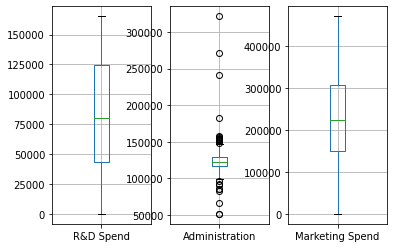

In [11]:
plt.subplot(1,3,1)
a = df.boxplot(column = ['R&D Spend'])
plt.subplot(1,3,2)
b = df.boxplot(column = ['Administration'])
plt.subplot(1,3,3)
c = df.boxplot(column = ['Marketing Spend'])



97893.03512500001
147886.76772499998


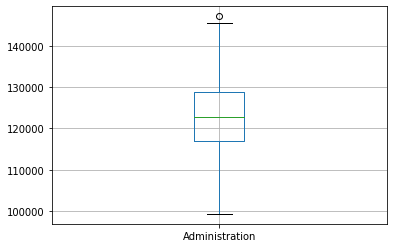

In [12]:
df1 = df.copy()
q1 = np.percentile(df1['Administration'],25)
q3 = np.percentile(df1['Administration'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
print(low)
print(high)

b = list(np.where(df1['Administration'] > high)and(df1['Administration']<low))
df1.drop(df1.index[b],inplace = True)
m1 = df1['Administration'].mean()
for i in df['Administration']:
    if i > high:
        df['Administration'].replace(to_replace = i,value = m1,inplace = True)
    if i < low:
        df['Administration'].replace(to_replace = i,value = m1,inplace = True)
        
df.boxplot(column = ['Administration'])

# Encoding

In [13]:
df_cat = df.select_dtypes(include = object)
encode = pd.get_dummies(df_cat)
df_encode = pd.DataFrame(encode)
df_encode.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


# Scaling

In [14]:
df_num = df.select_dtypes(include = 'number')
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scale = ss.fit_transform(df_num)
df_scaled = pd.DataFrame(scale,columns = df_num.columns)
df_scaled.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.799023,2.013468,2.682968,1.696301
1,1.739869,0.111848,2.378316,1.685343
2,1.543022,-3.013450,1.985407,1.668041
3,1.348048,-0.549178,1.715177,1.477956
4,1.299351,0.111848,1.529110,1.088053


In [15]:
df_concat = pd.concat([df_scaled,df_encode],axis = 1)
df_concat.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.799023,2.013468,2.682968,1.696301,0,0,1
1,1.739869,0.111848,2.378316,1.685343,1,0,0
2,1.543022,-3.013450,1.985407,1.668041,0,1,0
3,1.348048,-0.549178,1.715177,1.477956,0,0,1
4,1.299351,0.111848,1.529110,1.088053,0,1,0


In [16]:
target = df['Profit']
df_new = df_concat.drop('Profit',axis = 1)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_new,target,random_state = 1,test_size = 0.3)

In [18]:
print(y_test)

507     84808.91317
818     76356.55435
452    157529.61180
368    154029.58010
242     51256.61958
           ...     
459     90544.62544
415    149792.29490
61     114522.87560
347    137468.28760
349     92920.40974
Name: Profit, Length: 300, dtype: float64


In [19]:
from tensorflow.keras import layers
from tensorflow import keras

In [20]:
model = keras.Sequential([layers.Dense(1,input_shape = (6,))])
model.compile(optimizer = 'Adam',loss = 'mean_absolute_error',metrics = ['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs = 10) 

Epoch 1/10
22/22 [==============================] - 1s 1ms/step - loss: 120644.5234 - accuracy: 0.0000e+00
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.4922 - accuracy: 0.0000e+00
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.4219 - accuracy: 0.0000e+00
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.4141 - accuracy: 0.0000e+00
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.3516 - accuracy: 0.0000e+00
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.3203 - accuracy: 0.0000e+00
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 120644.2656 - accuracy: 0.0000e+00
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.2188 - accuracy: 0.0000e+00
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 120644.1797 - accuracy: 0.0000e+00
Epoch 10/10
22/22 [==================

In [22]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 116982.7031 - accuracy: 0.0000e+00


[116982.703125, 0.0]

In [23]:
df_concat1 = pd.concat([df_num,df_encode],axis = 1)
train_dataset = df_concat1.sample(frac=0.8, random_state=0)
test_dataset = df_concat1.drop(train_dataset.index)

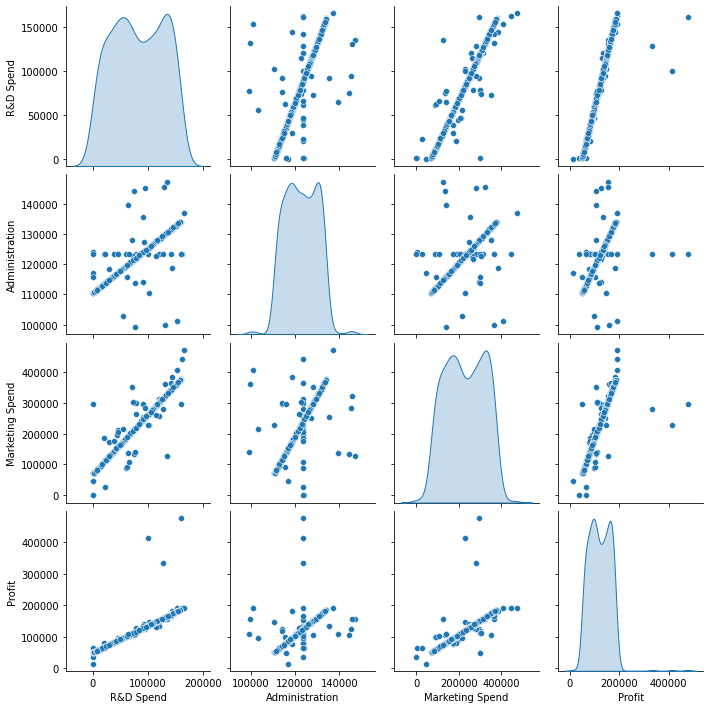

In [24]:
import seaborn as sns
sns.pairplot(train_dataset[['R&D Spend','Administration','Marketing Spend','Profit']], diag_kind='kde')

In [25]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Profit')
test_labels = test_features.pop('Profit')
print(train_features)

     R&D Spend  Administration  Marketing Spend  State_California  \
993   46798.00     117368.4374     159075.90800                 1   
859   45209.00     117133.7666     156009.92810                 1   
298   52746.00     118246.8651     170552.59020                 1   
553  147916.00     132302.0043     354183.36510                 0   
672   40178.00     116390.7656     146302.59990                 0   
..         ...             ...              ...               ...   
117    7715.00     111596.4819      83665.15275                 0   
464   49370.00     117748.2821     164038.58900                 0   
25    64664.71     139553.1600     137962.62000                 1   
110  105331.00     126012.8575     272015.49130                 0   
149   84834.00     122985.7671     232466.47380                 1   

     State_Florida  State_New York  
993              0               0  
859              0               0  
298              0               0  
553              1     

In [26]:
normalizer = keras.layers.Normalization(axis=-1)

In [27]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[8.2428188e+04 1.2264679e+05 2.2806569e+05 3.3499998e-01 3.2374999e-01
  3.4124997e-01]]


In [28]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 46798.   117368.44 159075.91      1.        0.        0.  ]]

Normalized: [[-0.76 -0.74 -0.76  1.41 -0.69 -0.72]]


In [29]:
horsepower = np.array(train_features['R&D Spend'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [30]:
horsepower_model = keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.compile(optimizer = 'Adam',loss = 'mean_absolute_error',metrics = ['accuracy'])

In [31]:
model.fit(train_features,train_labels,epochs = 10)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 152808.3125 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 123782.6875 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 99921.7266 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 80604.2266 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 64644.4297 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 51325.3750 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 40566.1484 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 32431.0449 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 26898.3750 - accuracy: 0.0000e+00
Epoch 10/10
25/25 [=========================